In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.optimize import minimize

## Dataset

In [9]:
D = np.genfromtxt("parts.csv")

In [10]:
d={}
d['x']=D[:,2]
d['y']=D[:,4]

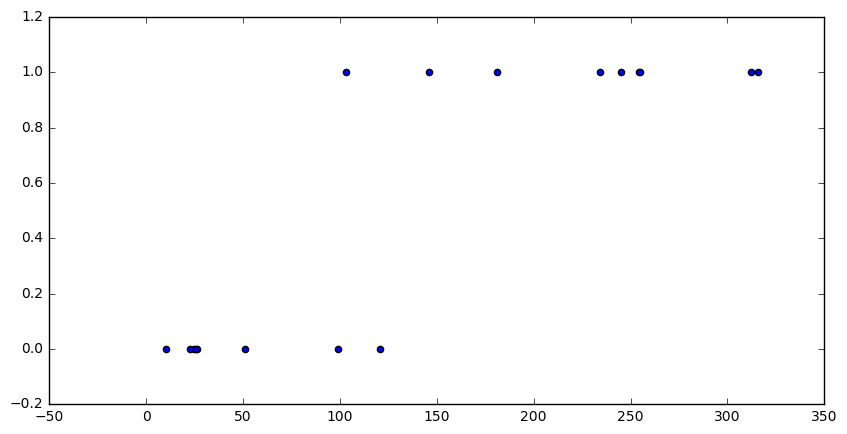

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])

## Model

In [12]:
def sig(x): return 1/(1+np.exp(-x))

In [13]:
def f(x,w): return sig(w[0] + x*w[1])

In [14]:
def LOG(x): 
    if x>1e-9: return np.log(x)
    else: return np.log(1e-9)
def dist(a,b):
    if b>0.1: return -LOG(a)
    else: return -LOG(1-a)

In [15]:
def loss(w,d):
    loss = 0# w[1]**2
    for i in range(len(d['x'])):
        x = d['x'][i]
        y = d['y'][i]
        loss += dist(f(x,w),y)
    return loss

In [16]:
loss([0,-1],d)

186.50942970231392

In [17]:
def F(w): return loss(w,d)

## Minimize the Loss using Numerical Optimization

In [18]:
M=minimize(F,[0,0],tol=0.01)

In [19]:
w_hat=M.x
print(w_hat)

[-7.30538001  0.06279924]


## Visualize Loss Function

In [20]:
xlim = (-10,10,300)
ylim = (-.5,.5,300)
X = np.linspace(*xlim)
Y = np.linspace(*ylim)
Z = np.array([[ F([x,y]) for x in X] for y in Y ])

def rescale(Z):
    z_min = np.percentile(Z,0)
    z_max = np.percentile(Z,80)
    z_range = z_max - z_min
    Z_scaled = (Z-z_min)/z_range
    Z_scaled[Z_scaled > 1] = 1
    return Z_scaled

Z_scaled = rescale(Z)

# left right bottom top
extent = (xlim[0],xlim[1],ylim[1],ylim[0])
x_range = xlim[1]-xlim[0]
y_range = ylim[1]-ylim[0]
aspect = x_range/y_range/2

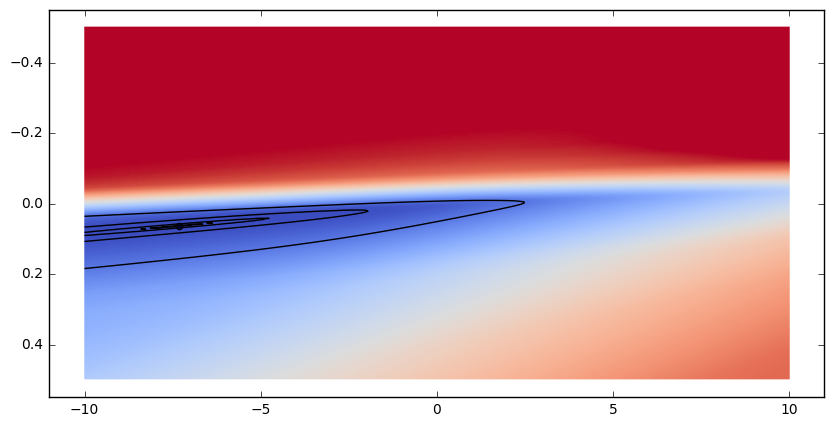

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(Z,cmap=cm.coolwarm,vmin=np.min(Z),vmax=np.percentile(Z,80), extent=extent, aspect=aspect)
plt.contour(X,Y,Z_scaled,[0.0001, 0.001, 0.01, 0.1,11],colors="black")
plt.scatter(*w_hat)
plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-log.png",transparent=True, bbox_inches="tight")

## Optimal Model

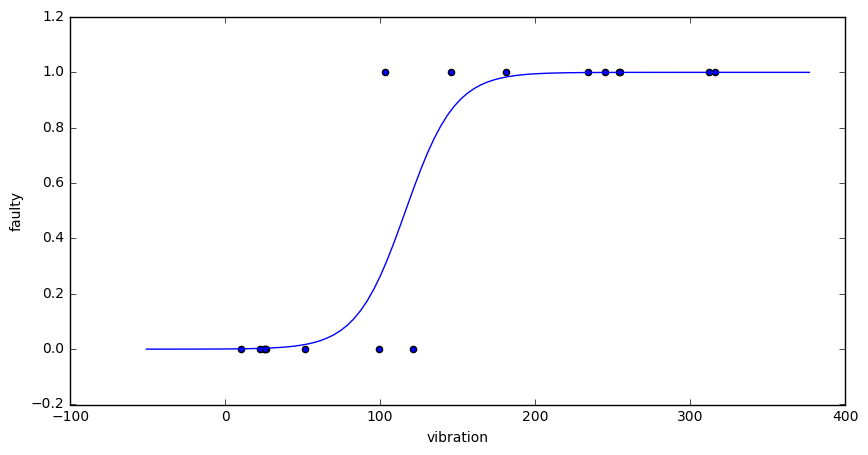

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])
r = np.max(d['x']) - np.min(d['x'])
X = np.linspace(np.min(d['x'])-0.2*r,np.max(d['x'])+0.2*r,100)
Y = [f(x,w_hat) for x in X]
plt.plot(X,Y)
plt.xlabel("vibration")
plt.ylabel("faulty")
# plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-log-model.png",transparent=True, bbox_inches="tight")